## 4. Ajuste de la gaussiana

**1. Grafique los datos**

In [1]:
import pandas as pd
import uncertainties as un
from uncertainties import umath
from uncertainties import ufloat
import matplotlib.pyplot as plt
import numpy as np

In [23]:
df = pd.read_csv("gauss+recta+incert.csv")
x = df.iloc[:,0].to_numpy()
y = df.iloc[:,1].to_numpy()
dy = df.iloc[:,2].to_numpy()
df

,x(cm),y(cuentas),dy(cuentas)
0,110.0,5975,92
1,112.5,5921,126
2,115.0,5763,16
3,117.5,5869,114
4,120.0,5818,89
5,122.5,5740,51
6,125.0,5751,112
7,127.5,5808,87
8,130.0,5694,116
9,132.5,5690,92


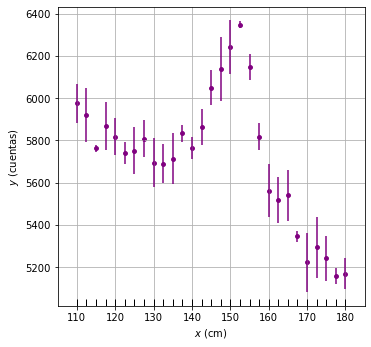

In [24]:
from matplotlib.collections import EventCollection

fig, ax = plt.subplots(figsize = (5.5,5.5))
ax.scatter(x, y, s = 15, color = "purple")
ax.errorbar(x, y, yerr = dy, fmt = "none", color = "purple")
ax.set_xticks(np.arange(100, 200, 10))
ax.set_xlim((105, 185))
ax.set_ylabel(r"$y$ (cuentas)")
ax.set_xlabel(r"$x$ (cm)")

xevents = EventCollection(x, color = "k", linelength = int(10100), linewidth = 1)
ax.add_collection(xevents)
ax.grid(True, axis = "both")
fig.savefig("datos_brutos_xy.png")

plt.show()

Según la grilla tenemos que la media es

\begin{equation}
\begin{split}
    \mu \approx 152.5 \text{cm}\,,\\
\end{split}
\end{equation}

Ahora, para determinar los parámetros de la función recta de fondo de la gaussiana tomamos dos puntos de los extremos de la gráfica para los cuales la influencia de la función gaussiana sería reducida y calculamos a partir de ellos la pediente de la recta

\begin{equation}
\begin{split}
    b_1 = \frac{y_{1} - y_{0}}{x_{1}-x_{0}}
\end{split}
\end{equation}

In [4]:
y0 = ufloat(y[0], dy[0])
y1 = ufloat(y[-1], dy[-1])
x0 = x[0]
x1 = x[-1]

b1 = (y1-y0)/(x1-x0)
print(f"b1 = {b1:1.0f}")
print(x0, y0)
print(x1, y1)

b1 = -12+/-2
110.0 (5.97+/-0.09)e+03
180.0 (5.17+/-0.07)e+03


Con esto, tenemos que, para un valor conocido como en el valor extremo utilizado para hallar la pediente 

\begin{equation}
\begin{split}
    y_1 \approx &  r(x_1) = b_0 + b_1(x_1 - \mu)\,,\\
    b_0 =& y_1 - b_1(x_1 - \mu)\,,
\end{split}
\end{equation}

tal que

In [5]:
μ = 152.5
b0 = y1 - b1*(x1-μ)
print(f"b0 = {b0:1.0f}")

b0 = 5486+/-57


Ahora, la altura desde la base gaussiana hasta su máximo está dada como

\begin{equation}
    M = f(\mu)-b_0
\end{equation}

con lo que con el valor de la media aproximado, buscamos el valor correspondiente en la gaussiana como

In [6]:
for i in range(len(y)):
    imax = i
    if x[i]>152:
        break
        
fμ = ufloat(y[imax], dy[imax])

print(r"f(μ)"+f" = {fμ:1.0f}")

M = fμ-b0

print(f"M = {M:1.0f}")

f(μ) = 6348+/-17
M = 862+/-60


Luego, con todos estos valores despejamos la desviación estándar para el valor de $x_g$, el cual es un valor de x tal que la contribución gaussiana se vuelve en notable en los datos, diferente a la media

\begin{equation}
\begin{split}
    f(x_g) = y_g =& M \exp\Big[-\frac{1}{2}\Big(\frac{x_g-\mu}{\sigma}\Big)^2\Big]+ b_0 + b_1 (x_g-\mu)\,,\\
    M \exp\Big[-\frac{1}{2}\Big(\frac{x_g-\mu}{\sigma}\Big)^2\Big] =& y_g - b_0 - b_1 (x_g-\mu)\,,\\
    \ln(M) - \frac{1}{2}\Big(\frac{x_g-\mu}{\sigma}\Big)^2 =& \ln(y_g - b_0 - b_1 (x_g-\mu))\,,\\
    \ln(M)- \ln(y_g - b_0 - b_1 (x_g-\mu)) =& \frac{1}{2}\Big(\frac{x_g-\mu}{\sigma}\Big)^2\,,\\
    \Big(\frac{x_g-\mu}{\sigma}\Big) =& \sqrt{2\Big\{\ln(M)- \ln(y_g - b_0 - b_1 (x_g-\mu))\Big\}}\,,\\
    \sigma =& \frac{x_g-\mu}{\sqrt{2\Big\{\ln(M)- \ln(y_g - b_0 - b_1 (x_g-\mu))\Big\}}}\,,
\end{split}
\end{equation}

Tal que

Sabemos que para $M/2$ el ancho de la función de gauss es de $2\sigma$, luego, tomando la base de la recta tal que la mitad de la gaussiana se encuentre en

\begin{equation}
\begin{split}
    r_{1/2} =& \Big[\frac{M}{2}+b_0\big] + b_1(x-\mu)\,,\\
\end{split}
\end{equation}

tal que los datos más cercanos a esta recta serán los tomados para calcular "a ojo" el valor de $\sigma$

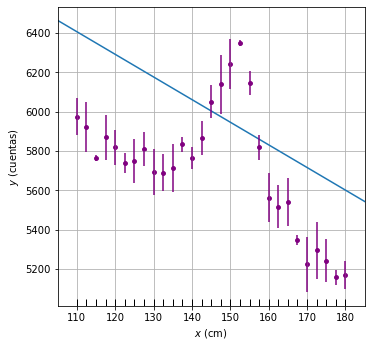

In [26]:

def midle_line(X):
    return M.nominal_value/2 + b0.nominal_value + b1.nominal_value*(X - μ)
    

xg = np.linspace(105, 195, 1000)
yg = midle_line(xg)

fig, ax = plt.subplots(figsize = (5.5,5.5))
ax.plot(xg, yg)
ax.scatter(x, y, s = 15, color = "purple")
ax.errorbar(x, y, yerr = dy, fmt = "none", color = "purple")
ax.set_xticks(np.arange(100, 200, 10))
ax.set_xlim((105, 185))
ax.set_ylabel(r"$y$ (cuentas)")
ax.set_xlabel(r"$x$ (cm)")

xevents = EventCollection(x, color = "k", linelength = int(10100), linewidth = 1)
ax.add_collection(xevents)
ax.grid(True, axis = "both")
fig.savefig("middle_line.pdf")

plt.show()

In [22]:
for i in range(len(x)):
    imin2 = i
    if x[i]>144:
        break
        
for i in range(len(x)):
    ipos2 = i
    if x[i]>156:
        break
        
σ = (x[ipos2] - x[imin2])/2
print(f"σ = {σ:0.2f}")
print(x[ipos2], x[imin2])

σ = 6.25
157.5 145.0


Luego, la función tiene la forma


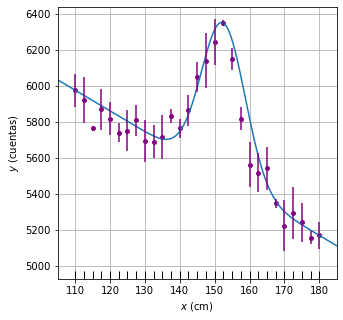

In [21]:
def gauss_ojo(x):
    return M.nominal_value*np.exp(-(1/2)*((x-μ)/σ)**2) + b0.nominal_value + b1.nominal_value*(x-μ)

fig, ax = plt.subplots(figsize = (5,5))
ax.plot(xg, gauss_ojo(xg))
ax.scatter(x, y, s = 15, color = "purple")
ax.errorbar(x, y, yerr = dy, fmt = "none", color = "purple")
ax.set_xticks(np.arange(100, 200, 10))
ax.set_xlim((105, 185))
ax.set_ylabel(r"$y$ (cuentas)")
ax.set_xlabel(r"$x$ (cm)")

xevents = EventCollection(x, color = "k", linelength = int(9950), linewidth = 1)
ax.add_collection(xevents)
ax.grid(True, axis = "both")

plt.show()

In [10]:
from lmfit import Parameters, fit_report, minimize
import scipy

p_true = Parameters()
p_true.add('amp', value=14.0)
p_true.add('period', value=5.46)
p_true.add('shift', value=0.123)
p_true.add('decay', value=0.032)


def residual(pars, x, data, sig):
    """Model a decaying sine wave and subtract data."""
    vals = pars.valuesdict()
    m = vals['m']
    mu = vals['mu']
    sigma = vals['sigma']
    B0 = vals['B0']
    B1 = vals['B1']
    
    model = m*np.exp(-(1/2)*((x-mu)/sigma)**2) + B0 + B1*(x-mu)
    resids = model-data
    weighted = np.sqrt(resids ** 2 / sig ** 2)
    return weighted

fit_params = Parameters()
fit_params.add('m', value= M.nominal_value)
fit_params.add('mu', value= μ)
fit_params.add('sigma', value= σ)
fit_params.add('B0', value = b0.nominal_value)
fit_params.add('B1', value= b1.nominal_value)

minim = minimize(residual, fit_params, args=(x,), kws={'data': y, "sig": dy})

out = minim.params
print(fit_report(minim))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 43
    # data points      = 29
    # variables        = 5
    chi-square         = 36.2461978
    reduced chi-square = 1.51025824
    Akaike info crit   = 16.4681211
    Bayesian info crit = 23.3046002
[[Variables]]
    m:      933.766019 +/- 31.4591280 (3.37%) (init = 861.75)
    mu:     150.603439 +/- 0.45902062 (0.30%) (init = 152.5)
    sigma:  6.66538127 +/- 0.42581989 (6.39%) (init = 6.25)
    B0:     5453.92190 +/- 20.3403703 (0.37%) (init = 5486.25)
    B1:    -9.41530161 +/- 0.57896850 (6.15%) (init = -11.5)
[[Correlations]] (unreported correlations are < 0.100)
    C(B0, B1)    = 0.623
    C(sigma, B0) = -0.606
    C(m, mu)     = -0.493
    C(mu, B0)    = -0.437
    C(mu, sigma) = 0.413
    C(sigma, B1) = -0.378
    C(mu, B1)    = -0.301
    C(m, B0)     = -0.248
    C(m, sigma)  = -0.177
    C(m, B1)     = -0.154


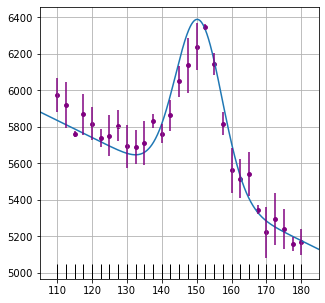

In [11]:
gauss_fitted = lambda X: out["m"].value*np.exp(-(1/2)*((X-out["mu"].value)/out["sigma"].value)**2) + out["B0"].value + out["B1"].value*(X-out["mu"].value)

fig, ax = plt.subplots(figsize = (5,5))
ax.plot(xg, gauss_fitted(xg))
ax.scatter(x, y, s = 15, color = "purple")
ax.errorbar(x, y, yerr = dy, fmt = "none", color = "purple")
ax.set_xticks(np.arange(100, 200, 10))
ax.set_xlim((105, 185))

xevents = EventCollection(x, color = "k", linelength = int(10100), linewidth = 1)
ax.add_collection(xevents)
ax.grid(True, axis = "both")

plt.show()

In [12]:
M_fit = out["m"].value
σ_fit = out["sigma"].value

I = np.sqrt(2*np.pi)*M_fit*σ_fit
print(I)

15601.020092108272


In [ ]:
from sklearn.metrics import r2_score